New and existing properties Pirce Comparison in the UK

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data/NewAndOldProperties.csv')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141783 entries, 0 to 141782
Data columns (total 14 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Date                              141783 non-null  datetime64[ns]
 1   Region_Name                       141783 non-null  object        
 2   Area_Code                         141783 non-null  object        
 3   New_Build_Average_Price           138906 non-null  float64       
 4   New_Build_Index                   138906 non-null  float64       
 5   New_Build_Monthly_Change          138510 non-null  float64       
 6   New_Build_Annual_Change           134178 non-null  float64       
 7   New_Build_Sales_Volume            136334 non-null  float64       
 8   Existing_Property_Average_Price   139110 non-null  float64       
 9   Existing_Property_Index           139110 non-null  float64       
 10  Existing_Property_Monthly_Change

In [6]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Year'] = data['Date'].dt.year

In [8]:
data["New_Build_Average_Price"] = pd.to_numeric(data["New_Build_Average_Price"], errors="coerce")


data = data[(data["Year"] >= 2005) & (data["Year"] <= 2025) & (data["Region_Name"] == "United Kingdom")]


new_build_price = (
    data.groupby("Year")["New_Build_Average_Price"]
         .mean()
         .reset_index(name="New_Build_AvgPrice_UK_Yearly")
)

print(new_build_price)

    Year  New_Build_AvgPrice_UK_Yearly
0   2005                 182343.250000
1   2006                 193937.916667
2   2007                 208994.583333
3   2008                 202258.000000
4   2009                 182146.333333
5   2010                 187364.000000
6   2011                 190186.083333
7   2012                 189397.083333
8   2013                 194941.666667
9   2014                 210652.000000
10  2015                 221356.250000
11  2016                 242055.250000
12  2017                 254419.583333
13  2018                 265498.166667
14  2019                 267676.833333
15  2020                 275387.916667
16  2021                 285083.500000
17  2022                 305963.416667
18  2023                 322026.500000
19  2024                 329905.750000
20  2025                 394526.666667


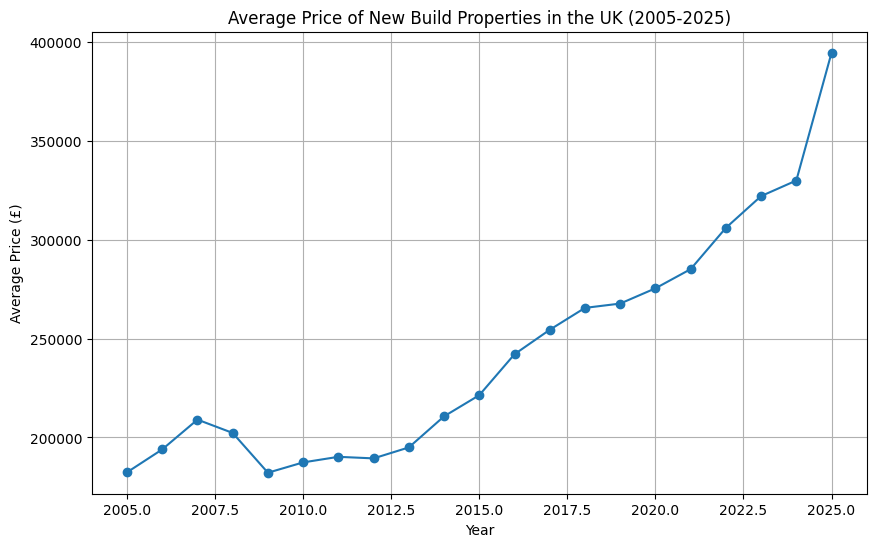

In [9]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(new_build_price["Year"], new_build_price["New_Build_AvgPrice_UK_Yearly"], marker='o')
plt.title("Average Price of New Build Properties in the UK (2005-2025)")
plt.xlabel("Year")
plt.ylabel("Average Price (£)")
plt.grid()
plt.show() 

In [12]:
data["New_Build_Annual_Change"] = pd.to_numeric(data["New_Build_Annual_Change"], errors="coerce")


data = data[(data["Year"] >= 2005) & (data["Year"] <= 2025) & (data["Region_Name"] == "United Kingdom")]


newbuild_yearly_change = (
    data.groupby("Year")["New_Build_Annual_Change"]
         .mean()
         .reset_index(name="New_Build_AvgChange_UK_Yearly")
)

print(newbuild_yearly_change)

    Year  New_Build_AvgChange_UK_Yearly
0   2005                            NaN
1   2006                       6.366667
2   2007                       7.775000
3   2008                      -3.066667
4   2009                      -9.600000
5   2010                       2.866667
6   2011                       1.525000
7   2012                      -0.400000
8   2013                       2.908333
9   2014                       8.058333
10  2015                       5.091667
11  2016                       9.358333
12  2017                       5.150000
13  2018                       4.366667
14  2019                       0.816667
15  2020                       2.908333
16  2021                       3.550000
17  2022                       7.325000
18  2023                       5.275000
19  2024                       2.441667
20  2025                      21.800000


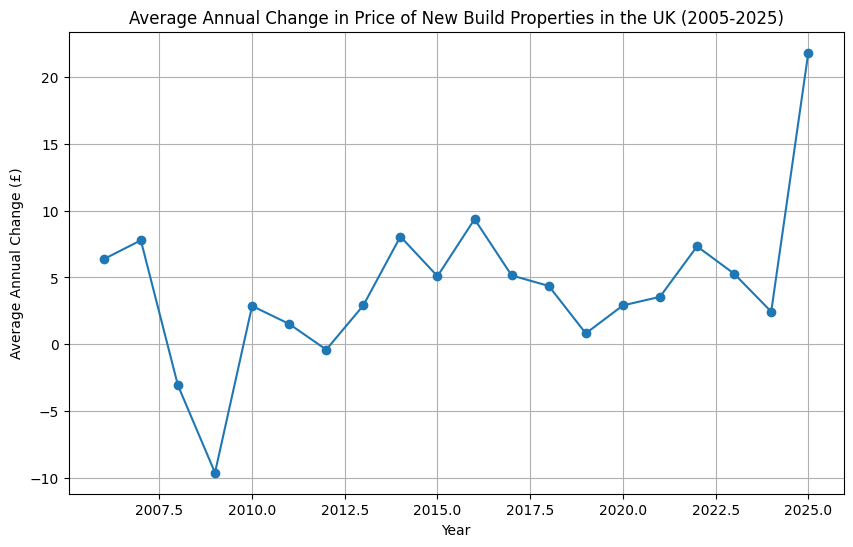

In [14]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(newbuild_yearly_change["Year"], newbuild_yearly_change["New_Build_AvgChange_UK_Yearly"], marker='o')
plt.title("Average Annual Change in Price of New Build Properties in the UK (2005-2025)")
plt.xlabel("Year")
plt.ylabel("Average Annual Change (£)")
plt.grid()
plt.show()